In [1]:
# Reber Grammar Implementation using Keras 

In [2]:
# Reber Grammar String Generator Class

In [3]:
import random as rnd

class ReberGrammarLexicon(object):

    lexicon = set() #contain Reber words
    graph = [ [(1,'T'), (2,'P')], \
            [(1, 'S'), (3, 'X')], \
            [(2,'T') ,(4, 'V')],  \
            [(2, 'X'), (5,'S')],           \
            [(3, 'P'),(5, 'V')],  \
            [(6,'E')] ]  #store the graph

    def __init__(self, num, maxSize = 1000): #fill Lexicon with num words

        self.maxSize = maxSize

        if maxSize < 5:
            raise NameError('maxSize too small, require maxSize > 4') 

        while len(self.lexicon) < num:

            word = self.generateWord()
            if word != None:
                self.lexicon.add(word)

    def generateWord(self): #generate one word

        c = 2
        currentEdge = 0
        word = 'B'

        while c <= self.maxSize:

            inc = rnd.randint(0,len(self.graph[currentEdge])-1)
            nextEdge = self.graph[currentEdge][inc][0]
            word += self.graph[currentEdge][inc][1]
            currentEdge = nextEdge
            if currentEdge == 6 :
                break
            c+=1

        if c > self.maxSize :
            return None

        return word

In [4]:
import numpy as np

In [5]:
maxsize = 20
inputdim = 7
outputdim = 7
hiddendim = 3

In [6]:
chars='BEPSTVX'

In [7]:
# One-hot encoding generated reber strings 

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
data = ['B', 'E', 'P', 'S', 'T', 'V', 'X']
values = np.array(data)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit(integer_encoded)

In [10]:
def func(word,start=0):
    word = np.array(list(word[start:]))
    encoded = label_encoder.transform(word)
    return onehot_encoded.transform(encoded.reshape(-1,1))    

In [11]:
# Padding each one-hot encoded input string to the maximum length

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

/Users/gokul/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gokul/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gokul/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gokul/opt/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

In [13]:
def pad(z):
    z = np.expand_dims(z,axis =0)
    padded = pad_sequences(z,maxlen=20,padding='post',value=[0.,0.,0.,0.,0.,0.,0.])
    return padded[0]    

In [14]:
def preprocessing(dictionary,start=0):
    length = len(dictionary)
    result = []
    
    for word in dictionary:
        result.extend(pad(func(word,start)))
        
    return np.array(result).reshape(length,maxsize,7)       

In [15]:
generator = ReberGrammarLexicon(2400,maxSize=20)

In [16]:
generator.lexicon

{'BTSSSSSSSSSSSSSSXSE',
 'BTSXXVPXTTVPXTTTVPSE',
 'BPVPXTVPXVPXTTTTTVVE',
 'BTXXTVPXVPXVPXTTVPSE',
 'BTSSSSSXXTTVPXVVE',
 'BTSXXTTVPXVVE',
 'BPTVPXTVPXTTVPXTTVVE',
 'BPTVPXTTTTTTTTTTVVE',
 'BTSSSXXTTTVPXTTVPSE',
 'BTSSSXXTVPXTTVPXVVE',
 'BTSSSXXTTTTTVPXTVVE',
 'BPVPXTTVPXTVPXVVE',
 'BTSXXTVPXTTTVPXTVPSE',
 'BTXXVPXTTVPXVPXTTVVE',
 'BPTTTTVPXTVPXVVE',
 'BTSSXXVPXVVE',
 'BTSSXXTVPXVPXVPSE',
 'BTSSXXTTTTTTVPXTVVE',
 'BTSXXTTTVPXTTTTTTVVE',
 'BTXXTTTVPXTVPXTTVPSE',
 'BTSSSSSXXTTTVPXTVVE',
 'BTSSSXXVPXTTTTTTVPSE',
 'BTSXXTTTVPXTVVE',
 'BTSSXXTVPXVPXTTVVE',
 'BTXXVPXTVPXTTTTTVPSE',
 'BTSSXXTTTTVPXVVE',
 'BPTTVPXVVE',
 'BTSXXTVPXTTVPXTTTVVE',
 'BTXXTTVPXTVPXVVE',
 'BPTTTTTTTTTTVPXTVVE',
 'BPTTTTTTTTTVPXTTTVVE',
 'BTXXTVPXTTVPXTVPXVVE',
 'BTSXSE',
 'BTXXTVPXVPXTTTVVE',
 'BPTTTVPXVPXTTVPXTVVE',
 'BPTVPXTTVPXVPXTTVVE',
 'BTSXXTTTTTTTTTTVPSE',
 'BPVPXVPXTVPXTTTVVE',
 'BTSSSXXTVPXTTVVE',
 'BTSXXVPXTVPXTTTVVE',
 'BPTTTVPXTVPXTTTTVVE',
 'BTXXVPXTTTVPSE',
 'BPTVPXVPXTTVPXTTTVVE',
 'BTSXXVPXVPXTTVPXVP

In [17]:
# Train-Test Split

In [18]:
X_train = preprocessing(list(generator.lexicon)[:2000])

In [19]:
y_train = preprocessing(list(generator.lexicon)[:2000],1)

In [20]:
X_test = preprocessing(list(generator.lexicon)[2000:])

In [21]:
y_test = preprocessing(list(generator.lexicon)[2000:],1)

In [22]:
#X_validation = preprocessing(list(generator.lexicon)[2000:])

In [23]:
#y_validation = preprocessing(list(generator.lexicon)[2000:],1)

In [24]:
# Model Creation

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,TimeDistributed,Dropout,LSTM

In [26]:
model = Sequential()

In [27]:
model.add(LSTM(15,activation='relu',return_sequences=True,input_shape=X_train.shape[1:]))

Instructions for updating:
Colocations handled automatically by placer.


In [28]:
model.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
model.add(TimeDistributed(Dense(outputdim,activation='softmax')))

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=5,verbose=1)

In [32]:
import tensorflow.keras.backend as K 
from tensorflow.keras.metrics import top_k_categorical_accuracy
def my_top_k(true, pred, num=2):
    true = K.reshape(true, (-1, outputdim))   
    pred = K.reshape(pred, (-1, outputdim))
    return top_k_categorical_accuracy(true, pred, k=num)

In [33]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=[my_top_k])

In [34]:
model.fit(x=X_train,y=y_train,batch_size=1,epochs=50,callbacks=[early_stop],validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1600/1600 [==============================] - 21s 13ms/sample - loss: 0.2617 - my_top_k: 0.6632 - val_loss: 0.1800 - val_my_top_k: 0.8147
Epoch 2/50
1600/1600 [==============================] - 20s 13ms/sample - loss: 0.1814 - my_top_k: 0.7977 - val_loss: 0.1498 - val_my_top_k: 0.8337
Epoch 3/50
1600/1600 [==============================] - 20s 13ms/sample - loss: 0.1626 - my_top_k: 0.8220 - val_loss: 0.1432 - val_my_top_k: 0.8418
Epoch 4/50
1600/1600 [==============================] - 20s 13ms/sample - loss: 0.1560 - my_top_k: 0.8482 - val_loss: 0.1445 - val_my_top_k: 0.8718
Epoch 5/50
1600/1600 [==============================] - 20s 13ms/sample - loss: 0.1533 - my_top_k: 0.8697 - val_loss: 0.1422 - val_my_top_k: 0.8852
Epoch 6/50
1600/1600 [==============================] - 20s 13ms/sample - loss: 0.1505 - my_top_k: 0.8765 - val_loss: 0.1415 - val_my_top_k: 0.8863
Epoch 7/50
1600/1

In [35]:
import pandas as pd

In [36]:
losses = pd.DataFrame(model.history.history)

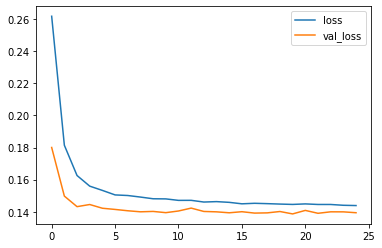

In [37]:
losses[['loss','val_loss']].plot()

In [38]:
score = model.evaluate(X_test, y_test, batch_size=1, verbose=1)

400/400 [==============================] - 1s 3ms/sample - loss: 0.1392 - my_top_k: 0.8525


In [39]:
z = model.predict(X_test)

In [40]:
# Analysis of a string

In [41]:
print(list(chars))
print((z.round(decimals=2)[0]))

['B', 'E', 'P', 'S', 'T', 'V', 'X']
[[0.   0.   0.41 0.   0.58 0.01 0.  ]
 [0.   0.   0.   0.74 0.   0.   0.26]
 [0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.71 0.29 0.  ]
 [0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.72 0.28 0.  ]
 [0.   0.   0.   0.   0.68 0.32 0.  ]
 [0.   0.   0.   0.   0.68 0.32 0.  ]
 [0.   0.   0.   0.   0.67 0.33 0.  ]
 [0.   0.   0.93 0.   0.   0.07 0.  ]
 [0.   0.   0.   0.05 0.   0.   0.95]
 [0.   0.   0.   0.   0.65 0.35 0.  ]
 [0.   0.   0.   0.   0.58 0.42 0.  ]
 [0.   0.   0.   0.   0.54 0.46 0.  ]
 [0.   0.   0.62 0.   0.   0.38 0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.15 0.15 0.14 0.17 0.17 0.09 0.13]
 [0.14 0.13 0.17 0.13 0.18 0.12 0.13]
 [0.14 0.14 0.15 0.12 0.18 0.14 0.13]]


In [61]:
temp(X_test[0])

['BTXXVPXTTTVPXTTVVE']

In [62]:
y_test[0]

array([[0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [63]:
def top_2_accuracy(y_test,y_pred):
    i = 0
    k = y_test.shape[0]*y_test.shape[1]
    correct = 0
    test = np.reshape(y_test,(y_test.shape[0]*y_test.shape[1],y_test.shape[2]))
    pred = np.reshape(y_pred,(y_pred.shape[0]*y_pred.shape[1],y_pred.shape[2]))
    while(i<len(test)):
        
        if (test[i] == np.array((0, 1, 0, 0, 0, 0, 0))).all(): 
            if (test[i].argmax() == pred[i].argsort()[-1]) | (test[i].argmax() == pred[i].argsort()[-2]):
                correct += 1
            k -= (20%i)
            i = i + (20%i)
            continue
        
        if (test[i].argmax() == pred[i].argsort()[-1]) | (test[i].argmax() == pred[i].argsort()[-2]):
            correct += 1
        i += 1
    print(correct)
    print(k)
    print(correct/k)        

In [64]:
top_2_accuracy(y_test,z)

2627
2676
0.9816890881913304


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# Loss function graph over epochs
# Binary Cross-Entropy Loss

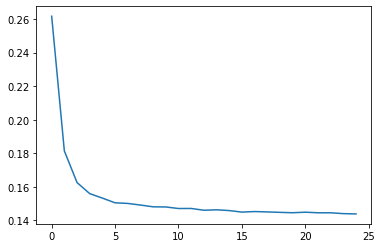

In [68]:
plt.plot(list(range(25)),model.history.history['loss'])

In [ ]:
# Retrieving back the hidden unit activation paterns

In [51]:
import tensorflow.keras.backend as K

In [52]:
lstm = model.layers[0]

# Get output from intermediate layer to visualize activations
attn_func = K.function(inputs = [model.get_input_at(0), K.learning_phase()],
           outputs = [lstm.output])

In [53]:
attn_func.outputs[0]

<tf.Tensor 'lstm/transpose_1:0' shape=(?, 20, 15) dtype=float32>

In [54]:
h = attn_func(X_test)[0]

In [55]:
len(h)

400

In [56]:
points = (h.round(decimals=2))

In [57]:
points.shape

(400, 20, 15)

In [58]:
# Hierarchical Clustering using Scipy

In [74]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [75]:
# Dendrogram

In [78]:
temp(X_test[0])

['BTXXVPXTTTVPXTTVVE']

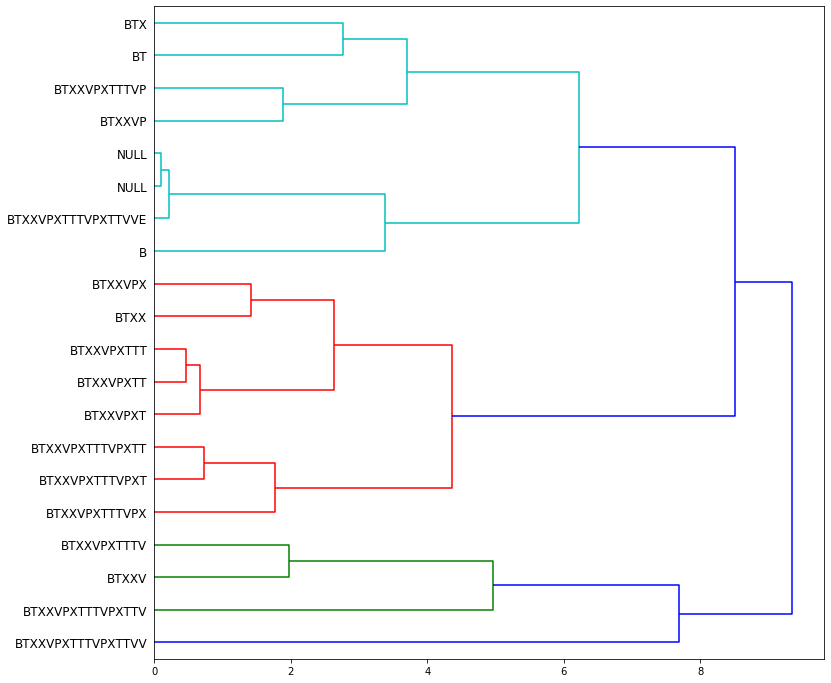

In [79]:
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(points[0],method='ward'),orientation='right',labels=labels[:20])

In [74]:
points[0]

array([[0.  , 0.  , 0.27],
       [0.  , 0.58, 0.  ],
       [0.  , 0.13, 0.  ],
       [0.  , 1.64, 0.  ],
       [0.26, 1.17, 1.17],
       [0.5 , 0.24, 2.39],
       [0.32, 0.55, 2.13],
       [3.61, 0.  , 0.11],
       [0.  , 1.88, 0.  ],
       [0.43, 1.09, 1.49],
       [0.5 , 0.28, 2.62],
       [0.47, 0.54, 2.34],
       [3.61, 0.  , 0.33],
       [0.  , 1.88, 0.  ],
       [0.43, 1.09, 1.5 ],
       [0.5 , 0.28, 2.62],
       [3.55, 0.  , 0.18],
       [0.  , 1.88, 0.  ],
       [0.  , 0.  , 0.  ],
       [0.05, 0.02, 0.  ]], dtype=float32)

In [ ]:
labels[40:60]

In [ ]:
temp(X_test[2])

In [ ]:
points[2]

In [90]:
chars

'BEPSTVX'

In [ ]:
# Saving Model
from tensorflow.keras.models import save_model,load_model
model.save("reber.h5")

In [ ]:
# Load Model
model = load_model("reber.h5")
a = model.predict(X_test)
(a.round(decimals=3)[3])

In [ ]:
# Preprocessor functions to format data to give as input to SCH Dendrogram function for Hierarchical Clustering

In [43]:
def seq2char(sequence):
    
    if sequence.any():
        return chars[sequence.argmax()]
    else:
        return ''    

In [44]:
def word(X):
    l = X.shape[0]
    result = []
    
    for i in range(l):
        temp = ''
        for sequence in X[i]:
            temp = temp + seq2char(sequence)
        result.append(temp)
        
    return result

In [45]:
def temp(X):
    X = np.expand_dims(X,axis=0)
    l = X.shape[0]
    result = []
    
    for i in range(l):
        temp = ''
        for sequence in X[i]:
            temp = temp + seq2char(sequence)
        result.append(temp)
        
    return result

In [46]:
word_list = word(X_test)

In [47]:
def func(word):
    label_list = []
    k=0

    for i in range(1,21):
        if i <= len(word):
            label_list.append(word[:i])
        else:
            label_list.append('NULL')
        
        k = k + 1
        
    return label_list

In [69]:
points_temp = points.reshape(points.shape[0]*points.shape[1],points.shape[2])

In [70]:
X_test_temp = X_test.reshape(X_test.shape[0]*X_test.shape[1],X_test.shape[2])

In [49]:
def label(X):
    result = []
    
    for i in range(0,len(X),maxsize):
        word_no = i // maxsize
        
        result.extend(func(word_list[word_no]))
        
    return result  

In [71]:
labels = label(X_test_temp)

In [72]:
len(labels)

8000

In [87]:
func(word_list[0])

['B',
 'BP',
 'BPT',
 'BPTT',
 'BPTTT',
 'BPTTTT',
 'BPTTTTT',
 'BPTTTTTV',
 'BPTTTTTVP',
 'BPTTTTTVPX',
 'BPTTTTTVPXV',
 'BPTTTTTVPXVP',
 'BPTTTTTVPXVPX',
 'BPTTTTTVPXVPXT',
 'BPTTTTTVPXVPXTV',
 'BPTTTTTVPXVPXTVV',
 'BPTTTTTVPXVPXTVVE',
 'NULL',
 'NULL',
 'NULL']

In [77]:
y_test_temp = y_test.reshape(y_test.shape[0]*y_test.shape[1],y_test.shape[2])

In [78]:
z_temp = z.reshape(z.shape[0]*z.shape[1],z.shape[2])